<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/Ensembles/voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('pokemon.csv', delimiter = ',')

In [ ]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df['Legendary'] = df['Legendary'].astype('int')  # when column to be predicted is in bool, catboost gives predicted column as str

In [ ]:
y = df['Legendary']
x = df.drop(['#', 'Name','Legendary'], axis = 1) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=30, stratify=y)

# lets measure f1 score with different different models :

- Tree
- AdaBoost
- CatBoost


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

dt_model = DecisionTreeClassifier()

# Fit on training data
rf_train = X_train.drop(['Type 1', 'Type 2'], axis = 1) 
rf_test = X_test.drop(['Type 1', 'Type 2'], axis = 1) 
dt_model.fit(rf_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.8737038498798034


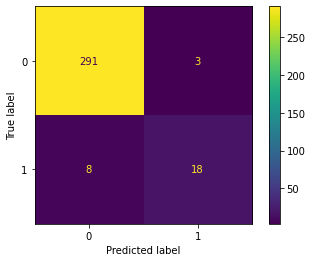

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(dt_model, rf_test, y_test,values_format = 'd')
print(metrics.f1_score(y_test,dt_model.predict(rf_test),average='macro'))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ab_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4)
)
ab_model.fit(rf_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

0.763156869619415


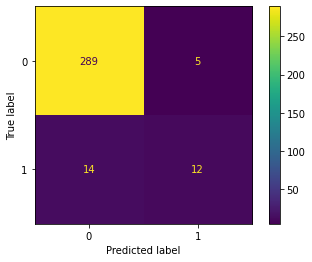

In [ ]:
_ = plot_confusion_matrix(ab_model, rf_test, y_test,values_format = 'd')
print(metrics.f1_score(y_test,ab_model.predict(rf_test),average='macro'))

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat_train = X_train
cat_test = X_test
cat_test["Type 2"] = cat_test["Type 2"].astype('str') 
cat_train["Type 2"] = cat_train["Type 2"].astype('str')  # for catboost categories column , type has to be int or str. Else nan values wont be imputed.
cat_model =  CatBoostClassifier( verbose=False, cat_features=[0,1])
cat_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0.8685340802987862


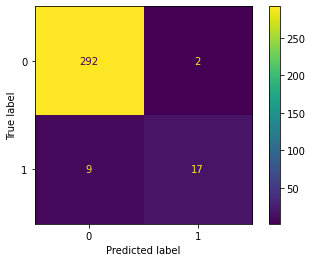

In [ ]:
_ = plot_confusion_matrix(cat_model, cat_test, y_test,values_format = 'd')
print(metrics.f1_score(y_test,cat_model.predict(cat_test),average='macro'))

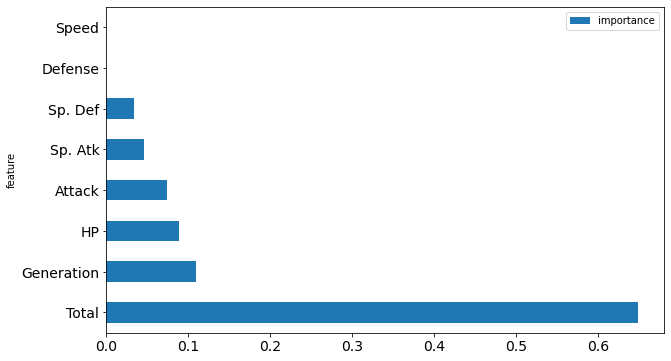

In [ ]:
dt_imp = dt_model.feature_importances_
dt_imp_df = pd.DataFrame({'feature': list(rf_train.columns),
                   'importance': dt_imp}).sort_values('importance',ascending = False)
dt_imp_df.set_index('feature').plot(kind='barh', figsize=(10, 6), fontsize=14)

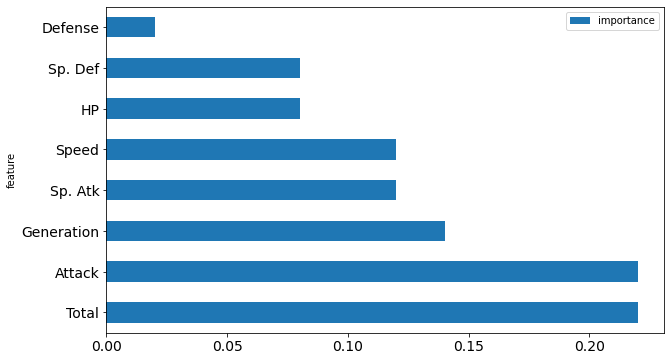

In [ ]:
ab_imp = ab_model.feature_importances_
ab_imp_df = pd.DataFrame({'feature': list(rf_train.columns),
                   'importance': ab_imp}).sort_values('importance',ascending = False)
ab_imp_df.set_index('feature').plot(kind='barh', figsize=(10, 6), fontsize=14)

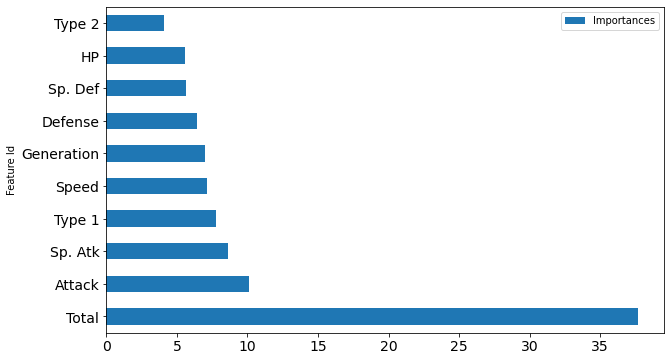

In [ ]:
import catboost
pool = catboost.Pool(cat_train, y_train, cat_features=[0,1])
cat_imp_df = cat_model.get_feature_importance(pool, fstr_type=catboost.EFstrType.FeatureImportance, prettified=True)
cat_imp_df.set_index('Feature Id').plot(kind='barh', figsize=(10, 6), fontsize=14)

In [ ]:
base_predictions_train = pd.DataFrame( {'Tree': dt_model.predict_proba(rf_test)[:,0],
     'AdaBoost': ab_model.predict_proba(rf_test)[:,0],
     'CatBoost': cat_model.predict_proba(cat_test)[:,0]
    })
base_predictions_train.head(10)

,Tree,AdaBoost,CatBoost
0,1.0,0.999440,0.998522
1,1.0,0.999990,0.999732
2,1.0,0.999374,0.999138
3,1.0,0.997239,0.999492
4,1.0,0.999983,0.999691
5,1.0,0.999456,0.999251
6,0.0,0.969796,0.893334
7,1.0,0.999915,0.997423
8,1.0,0.999995,0.996705
9,1.0,0.999988,0.999119


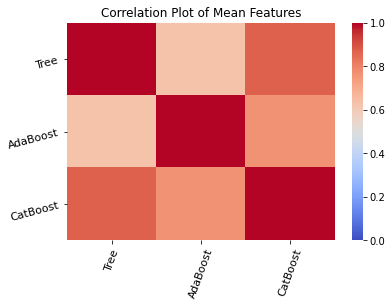

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
mean_corr = base_predictions_train[list(base_predictions_train)].corr()
g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=11)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=11)
plt.title("Correlation Plot of Mean Features")
plt.show()

- Ideally the corelation should be less and there should be more blues in the heat map.

# voting classifier :

- the VotingClassifier module allows you to implement a consensus method for as many different models as you’d like. You pass the VotingClassifier instantiated, unfitted models that you want to use, and choose between either a “hard” or “soft” voting for the consensus method.
- Hard voting is majority rule — whichever prediction has the most votes is chose. In case of a tie, hard voting will assign predictions based on ascending sort order.
-  In soft voting, predictions are chosen by summing the prediction probabilities from the individual models and choosing the prediction with the largest sum. Additionally, with soft voting you can choose to weight the predictions from some models higher than others. The default is a uniform weighting, but you can specify a different weighting scheme if you have reason to trust some models more than others.

- For pipeline related issues , visit :
https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

# custom transformer for sklearn pipeline
class CategoricalColumnRemover(TransformerMixin, BaseEstimator):
    def __init__(self):
      pass

    def transform(self, X):
       return X.drop(['Type 1', 'Type 2'], axis = 1)

    def fit(self, X, y=None):
        return self

# custom transformer for sklearn pipeline
class CategoricalColumn(TransformerMixin, BaseEstimator):
    def __init__(self):
      pass

    def transform(self, X):
       X["Type 2"] = X["Type 2"].astype('str') 
       X["Type 2"] = X["Type 2"].astype('str')
       return X

    def fit(self, X, y=None):
        return self


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

pipe_tree = Pipeline([
    ('col_extract', CategoricalColumnRemover()), # selecting features 0 and 1 (df1) to be used with LR (clf1)
    ('clf',  DecisionTreeClassifier())
    ])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

pipe_adaBoost = Pipeline([
    ('col_extract', CategoricalColumnRemover()), # selecting features 0 and 1 (df1) to be used with LR (clf1)
    ('clf',  AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4)))
    ])

In [ ]:
pipe_catBoost = Pipeline([
    ('col_extract', CategoricalColumn()), # selecting features 0 and 1 (df1) to be used with LR (clf1)
    ('clf',CatBoostClassifier(verbose=False, cat_features=[0,1]))
    ])

In [ ]:
pd.options.mode.chained_assignment = None
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('clf1', pipe_tree), ('clf2', pipe_adaBoost),('clf3',pipe_catBoost)]
                        , voting='soft')
vclf.fit(X_train, y_train)

 CategoricalColumnRemover init
 CategoricalColumnRemover init
CategoricalColumn


VotingClassifier(estimators=[('clf1',
                              Pipeline(memory=None,
                                       steps=[('col_extract',
                                               CategoricalColumnRemover()),
                                              ('clf',
                                               DecisionTreeClassifier(ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features=None,
                                                                      max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_impurity_split=None

0.8966667862652937


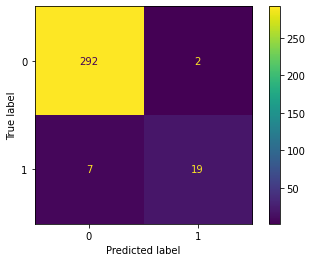

In [ ]:
_ = plot_confusion_matrix(vclf, X_test, y_test,values_format = 'd')
print(metrics.f1_score(y_test,vclf.predict(X_test),average='macro'))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'clf1__clf__max_depth': [3,4,5,6,7,8,9],
          'clf1__clf__max_features': [0.5, 0.75,None],
          'clf2__clf__base_estimator__max_depth' : [1,2,3,4,5],
          'clf2__clf__n_estimators': [50,100],
          'clf3__clf__max_depth':[3,5,7,10]
          }

grid = RandomizedSearchCV(estimator=vclf, param_distributions = params, cv=5,return_train_score=False,n_iter=20)
grid = grid.fit(X_train, y_train)

0.959375
0.850740913494313


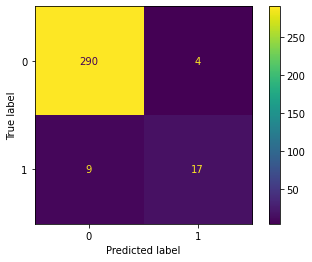

In [ ]:
_ = plot_confusion_matrix(grid.best_estimator_, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,grid.best_estimator_.predict(X_test)))
print(metrics.f1_score(y_test,grid.best_estimator_.predict(X_test),average='macro'))

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(grid.cv_results_)[['params','mean_test_score']]

,params,mean_test_score
0,"{'clf3__clf__max_depth': 7, 'clf2__clf__n_estimators': 100, 'clf2__clf__base_estimator__max_depth': 1, 'clf1__clf__max_features': None, 'clf1__clf__max_depth': 6}",0.952083
1,"{'clf3__clf__max_depth': 3, 'clf2__clf__n_estimators': 100, 'clf2__clf__base_estimator__max_depth': 2, 'clf1__clf__max_features': 0.5, 'clf1__clf__max_depth': 4}",0.945833
2,"{'clf3__clf__max_depth': 3, 'clf2__clf__n_estimators': 100, 'clf2__clf__base_estimator__max_depth': 4, 'clf1__clf__max_features': 0.5, 'clf1__clf__max_depth': 8}",0.947917
3,"{'clf3__clf__max_depth': 3, 'clf2__clf__n_estimators': 100, 'clf2__clf__base_estimator__max_depth': 5, 'clf1__clf__max_features': 0.5, 'clf1__clf__max_depth': 4}",0.945833
4,"{'clf3__clf__max_depth': 3, 'clf2__clf__n_estimators': 50, 'clf2__clf__base_estimator__max_depth': 4, 'clf1__clf__max_features': 0.5, 'clf1__clf__max_depth': 9}",0.947917
5,"{'clf3__clf__max_depth': 7, 'clf2__clf__n_estimators': 50, 'clf2__clf__base_estimator__max_depth': 5, 'clf1__clf__max_features': None, 'clf1__clf__max_depth': 8}",0.958333
6,"{'clf3__clf__max_depth': 7, 'clf2__clf__n_estimators': 50, 'clf2__clf__base_estimator__max_depth': 3, 'clf1__clf__max_features': 0.5, 'clf1__clf__max_depth': 8}",0.958333
7,"{'clf3__clf__max_depth': 5, 'clf2__clf__n_estimators': 50, 'clf2__clf__base_estimator__max_depth': 1, 'clf1__clf__max_features': 0.75, 'clf1__clf__max_depth': 3}",0.954167
8,"{'clf3__clf__max_depth': 10, 'clf2__clf__n_estimators': 50, 'clf2__clf__base_estimator__max_depth': 5, 'clf1__clf__max_features': 0.75, 'clf1__clf__max_depth': 5}",0.950000
9,"{'clf3__clf__max_depth': 10, 'clf2__clf__n_estimators': 50, 'clf2__clf__base_estimator__max_depth': 5, 'clf1__clf__max_features': None, 'clf1__clf__max_depth': 5}",0.958333


In [ ]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def hyperopt_train_test(params):
    clf = VotingClassifier(estimators=[('clf1', pipe_tree), ('clf2', pipe_adaBoost),('clf3',pipe_catBoost)]
                        , voting='soft')
    score = cross_val_score(clf, X_train, y_train,cv=4,scoring='accuracy').mean()
    print("score {:.4f} params {}".format(score, params))
    return -score

space4rf = {
    'clf2__clf__n_estimators': hp.choice('clf2__clf__n_estimators',range(100,500))
}

best = fmin(hyperopt_train_test, space4rf, algo=tpe.suggest, max_evals=20)

score 0.9542 params {'clf2__clf__n_estimators': 451}
score 0.9583 params {'clf2__clf__n_estimators': 297}
score 0.9521 params {'clf2__clf__n_estimators': 103}
score 0.9583 params {'clf2__clf__n_estimators': 411}
score 0.9521 params {'clf2__clf__n_estimators': 400}
score 0.9646 params {'clf2__clf__n_estimators': 448}
score 0.9563 params {'clf2__clf__n_estimators': 100}
score 0.9563 params {'clf2__clf__n_estimators': 467}
score 0.9625 params {'clf2__clf__n_estimators': 333}
score 0.9583 params {'clf2__clf__n_estimators': 157}
score 0.9625 params {'clf2__clf__n_estimators': 216}
score 0.9521 params {'clf2__clf__n_estimators': 302}
score 0.9583 params {'clf2__clf__n_estimators': 117}
score 0.9604 params {'clf2__clf__n_estimators': 367}
score 0.9563 params {'clf2__clf__n_estimators': 180}
score 0.9542 params {'clf2__clf__n_estimators': 203}
score 0.9500 params {'clf2__clf__n_estimators': 338}
score 0.9417 params {'clf2__clf__n_estimators': 161}
score 0.9625 params {'clf2__clf__n_estimators'

In [ ]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'clf2__clf__n_estimators': 348}


In [ ]:
from sklearn.ensemble import VotingClassifier
pipe_adaBoost_best = Pipeline([
    ('col_extract', CategoricalColumnRemover()), # selecting features 0 and 1 (df1) to be used with LR (clf1)
    ('clf',  AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),n_estimators = 348))
    ])
vclf_best = VotingClassifier(estimators=[('clf1', pipe_tree), ('clf2', pipe_adaBoost_best),('clf3',pipe_catBoost)]
                        , voting='soft')
vclf_best.fit(X_train, y_train)

VotingClassifier(estimators=[('clf1',
                              Pipeline(memory=None,
                                       steps=[('col_extract',
                                               CategoricalColumnRemover()),
                                              ('clf',
                                               DecisionTreeClassifier(ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features=None,
                                                                      max_leaf_nodes=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_impurity_split=None

0.965625
0.8685340802987862


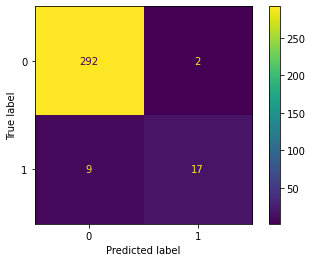

In [ ]:
_ = plot_confusion_matrix(vclf_best, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,vclf_best.predict(X_test)))
print(metrics.f1_score(y_test,vclf_best.predict(X_test),average='macro'))